In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogsvscats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:16<00:00, 71.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, regularizers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, BatchNormalization
from keras.applications.vgg16 import VGG16

In [ ]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
val_data = keras.utils.image_dataset_from_directory(
    directory = '/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)
conv_base.trainable = False

In [ ]:
import keras
from keras import layers

# 1. Define the augmentation stages
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# 2. Apply it to the training dataset using .map
# We only augment the images (x), not the labels (y)
train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

In [ ]:
#normalization(all pixels  (0-1))
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
  9/625 ━━━━━━━━━━━━━━━━━━━━ 5:21:48 31s/step - accuracy: 0.5451 - loss: 2.8101

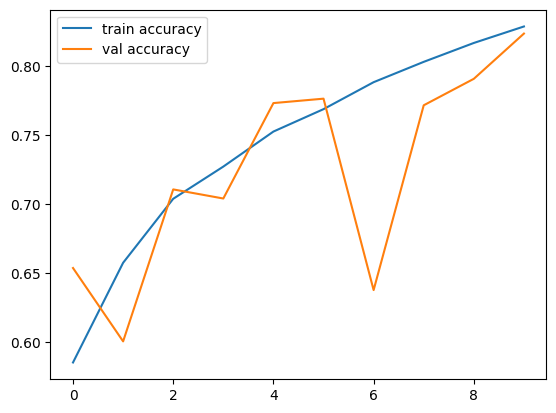

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

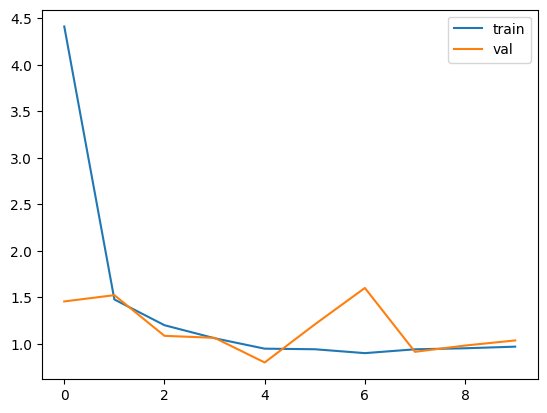

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.10.jpg')

TypeError: Image data of dtype object cannot be converted to float

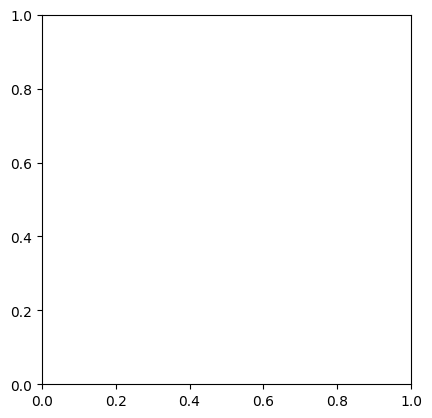

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(499, 489, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


array([[0.]], dtype=float32)

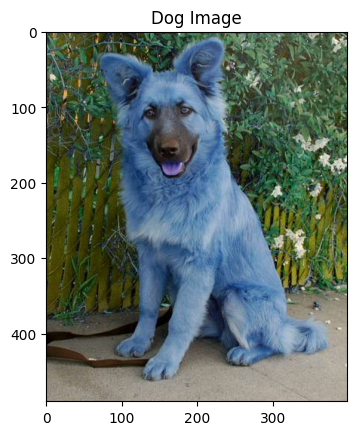

In [ ]:
dog_img = cv2.imread('/content/dog.10014.jpg')
plt.imshow(dog_img)
plt.title('Dog Image')
plt.show()

In [ ]:
dog_img_resized = cv2.resize(dog_img, (256, 256))
dog_input = dog_img_resized.reshape((1, 256, 256, 3))

# Normalize the image similar to how training data was processed
dog_input = dog_input / 255.0

print("Dog image shape after preprocessing:", dog_input.shape)

Dog image shape after preprocessing: (1, 256, 256, 3)


In [ ]:
dog_prediction = model.predict(dog_input)
print("Prediction for dog image:", dog_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
Prediction for dog image: [[0.98896885]]


Now, let's re-evaluate the prediction for the cat image, ensuring it's also normalized, and then compare both predictions.

In [ ]:
cat_img_raw = cv2.imread('/content/cat.jpg')
cat_img_resized = cv2.resize(cat_img_raw, (256, 256))
cat_input = cat_img_resized.reshape((1, 256, 256, 3))

# Normalize the cat image similar to how training data was processed
cat_input = cat_input / 255.0

cat_prediction = model.predict(cat_input)
print("Prediction for cat image:", cat_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction for cat image: [[0.5141498]]
